In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('D:\Major_Project\Dataset\clean_dataset.csv')
df= df.drop('ZipCode', axis = 1)
df['Income'] = df['Income']*132

In [6]:
df.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,73920,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,108768,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,396,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,4129620,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,178068,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,41448,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,190344,1


In [7]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,6.900000e+02,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,1.342949e+05,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,6.877335e+05,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,6.600000e+02,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,5.220600e+04,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,1.320000e+07,1.000000


In [8]:
list(df.columns)

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'Industry',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Citizen',
 'Income',
 'Approved']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  Income          690 non-null    int64  
 14  Approved        690 non-null    int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 81.0+ KB


In [10]:
df.shape

(690, 15)

In [11]:
df.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
Income            240
Approved            2
dtype: int64

In [12]:
df['Approved'].value_counts()

Approved
0    383
1    307
Name: count, dtype: int64

In [13]:
df['Approved'].value_counts(normalize=True)

Approved
0    0.555072
1    0.444928
Name: proportion, dtype: float64

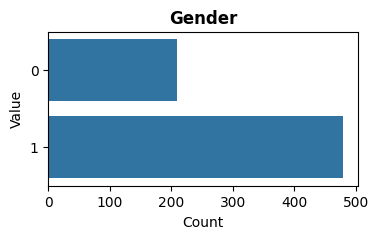

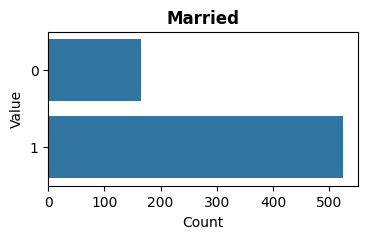

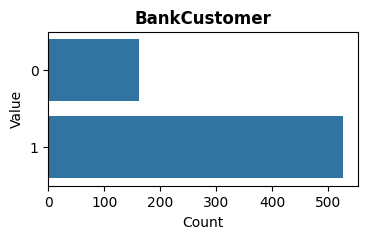

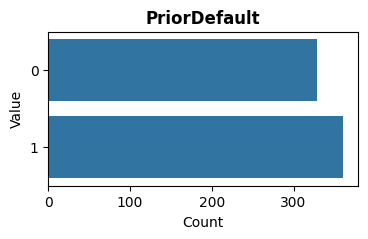

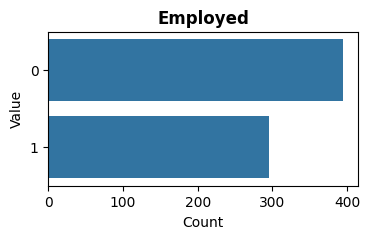

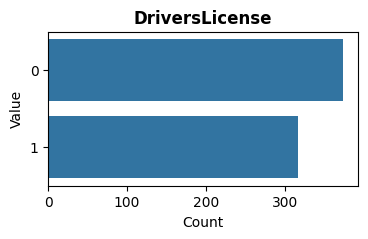

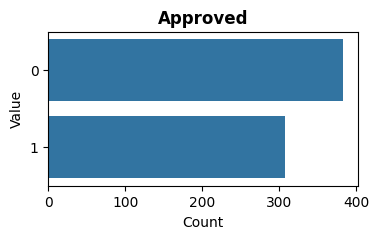

In [14]:
binary_cols = []

for col in df.select_dtypes(include=['int64']):
    if len(df[col].unique()) == 2 and 0 in df[col].unique() and 1 in df[col].unique():
        binary_cols.append(col)

for col in binary_cols:
    plt.subplots(figsize=(4,2))
    sns.countplot(y=col, data=df)
    plt.title(col, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('Value')
    plt.show()

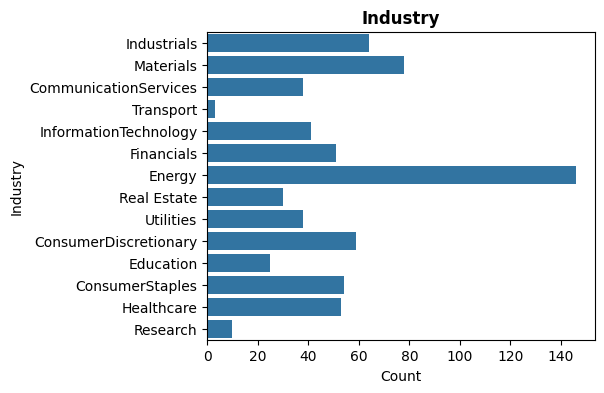

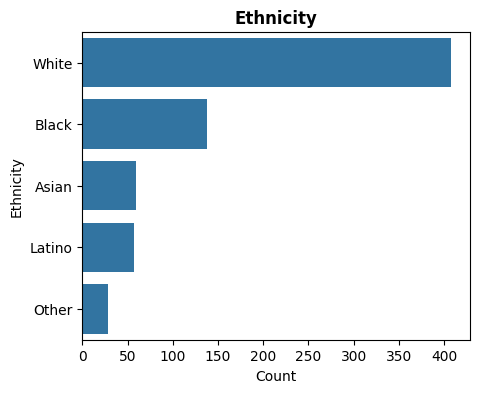

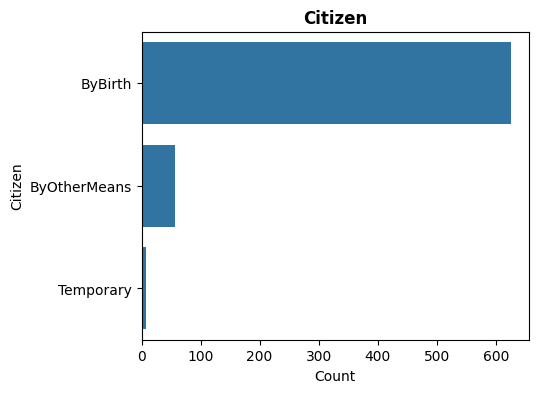

In [15]:
object_cols = df.select_dtypes(include='object')

for col in object_cols:
    plt.subplots(figsize=(5,4))
    sns.countplot(y=col, data=df)
    plt.title(col, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

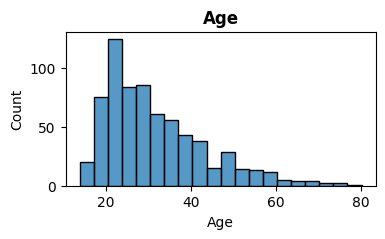

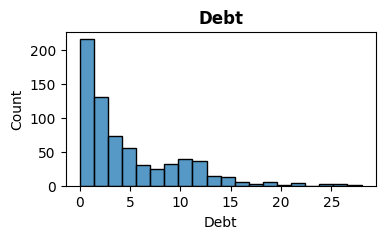

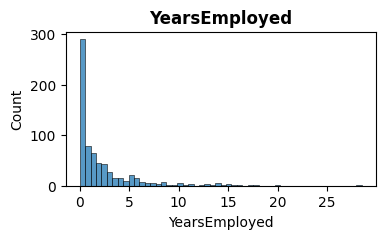

In [17]:
num_cols = df.select_dtypes(include='float64').columns.tolist()

for col in num_cols:
    plt.subplots(figsize=(4,2))
    sns.histplot(df[col], kde=False)
    plt.grid(False)
    plt.title(col, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [25]:
dv = pd.get_dummies(df)

In [26]:
dv.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,False,False,False,False,False,False,True,True,False,False
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,False,False,False,True,False,False,False,True,False,False
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,False,False,False,True,False,False,False,True,False,False
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,False,False,False,False,False,False,True,True,False,False
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,False,False,False,False,False,False,True,False,True,False


In [27]:
dv.corr()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
Gender,1.000000,0.035044,-0.041746,-6.806208e-02,-0.071250,0.086544,-0.026047,-0.077784,-0.024630,0.051674,...,0.043709,0.007804,0.078356,-3.937130e-02,-0.133317,-0.055523,0.084407,-0.083916,0.084069,0.012792
Age,0.035044,1.000000,0.202177,1.069291e-01,0.099477,0.391464,0.204434,0.086037,0.187327,0.053599,...,-0.009669,0.006971,0.123759,1.954782e-02,0.164837,0.075785,-0.209031,0.012625,-0.018712,0.013670
Debt,-0.041746,0.202177,1.000000,7.464878e-02,0.083781,0.298902,0.244317,0.174846,0.271207,-0.013023,...,0.011131,0.064218,-0.003667,6.126905e-02,0.037302,0.116594,-0.115455,0.123569,-0.116404,-0.037842
Married,-0.068062,0.106929,0.074649,1.000000e+00,0.992033,0.069945,0.145073,0.175428,0.113968,-0.009784,...,-0.014594,0.001295,0.037772,-9.901886e-18,-0.090956,-0.022460,0.038464,-0.017953,0.007781,0.028979
BankCustomer,-0.071250,0.099477,0.083781,9.920331e-01,1.000000,0.075905,0.138535,0.170268,0.111077,-0.002402,...,-0.015106,-0.000347,0.035844,-3.411936e-03,-0.080992,-0.006666,0.030418,-0.039188,0.018160,0.060234
YearsEmployed,0.086544,0.391464,0.298902,6.994456e-02,0.075905,1.000000,0.345689,0.222982,0.322330,0.138139,...,0.039224,0.062229,0.074188,1.784135e-01,-0.073321,0.036877,-0.161115,0.031670,-0.007965,-0.065938
PriorDefault,-0.026047,0.204434,0.244317,1.450732e-01,0.138535,0.345689,1.000000,0.432032,0.379532,0.091276,...,0.018983,0.154150,0.042875,1.871579e-01,-0.177308,-0.024254,-0.067649,0.129207,-0.092985,-0.113451
Employed,-0.077784,0.086037,0.174846,1.754276e-01,0.170268,0.222982,0.432032,1.000000,0.571498,0.017043,...,-0.012583,0.099570,-0.044258,8.056068e-02,-0.003933,0.000430,-0.038346,0.248609,-0.227403,-0.093598
CreditScore,-0.024630,0.187327,0.271207,1.139678e-01,0.111077,0.322330,0.379532,0.571498,1.000000,0.006944,...,0.008159,0.018042,0.032423,6.546384e-02,-0.033368,0.025393,-0.063216,0.142938,-0.130871,-0.053491
DriversLicense,0.051674,0.053599,-0.013023,-9.784401e-03,-0.002402,0.138139,0.091276,0.017043,0.006944,1.000000,...,0.071891,0.020365,0.072605,3.490615e-02,-0.127900,0.002607,0.000875,0.007649,0.020030,-0.072382


<Axes: >

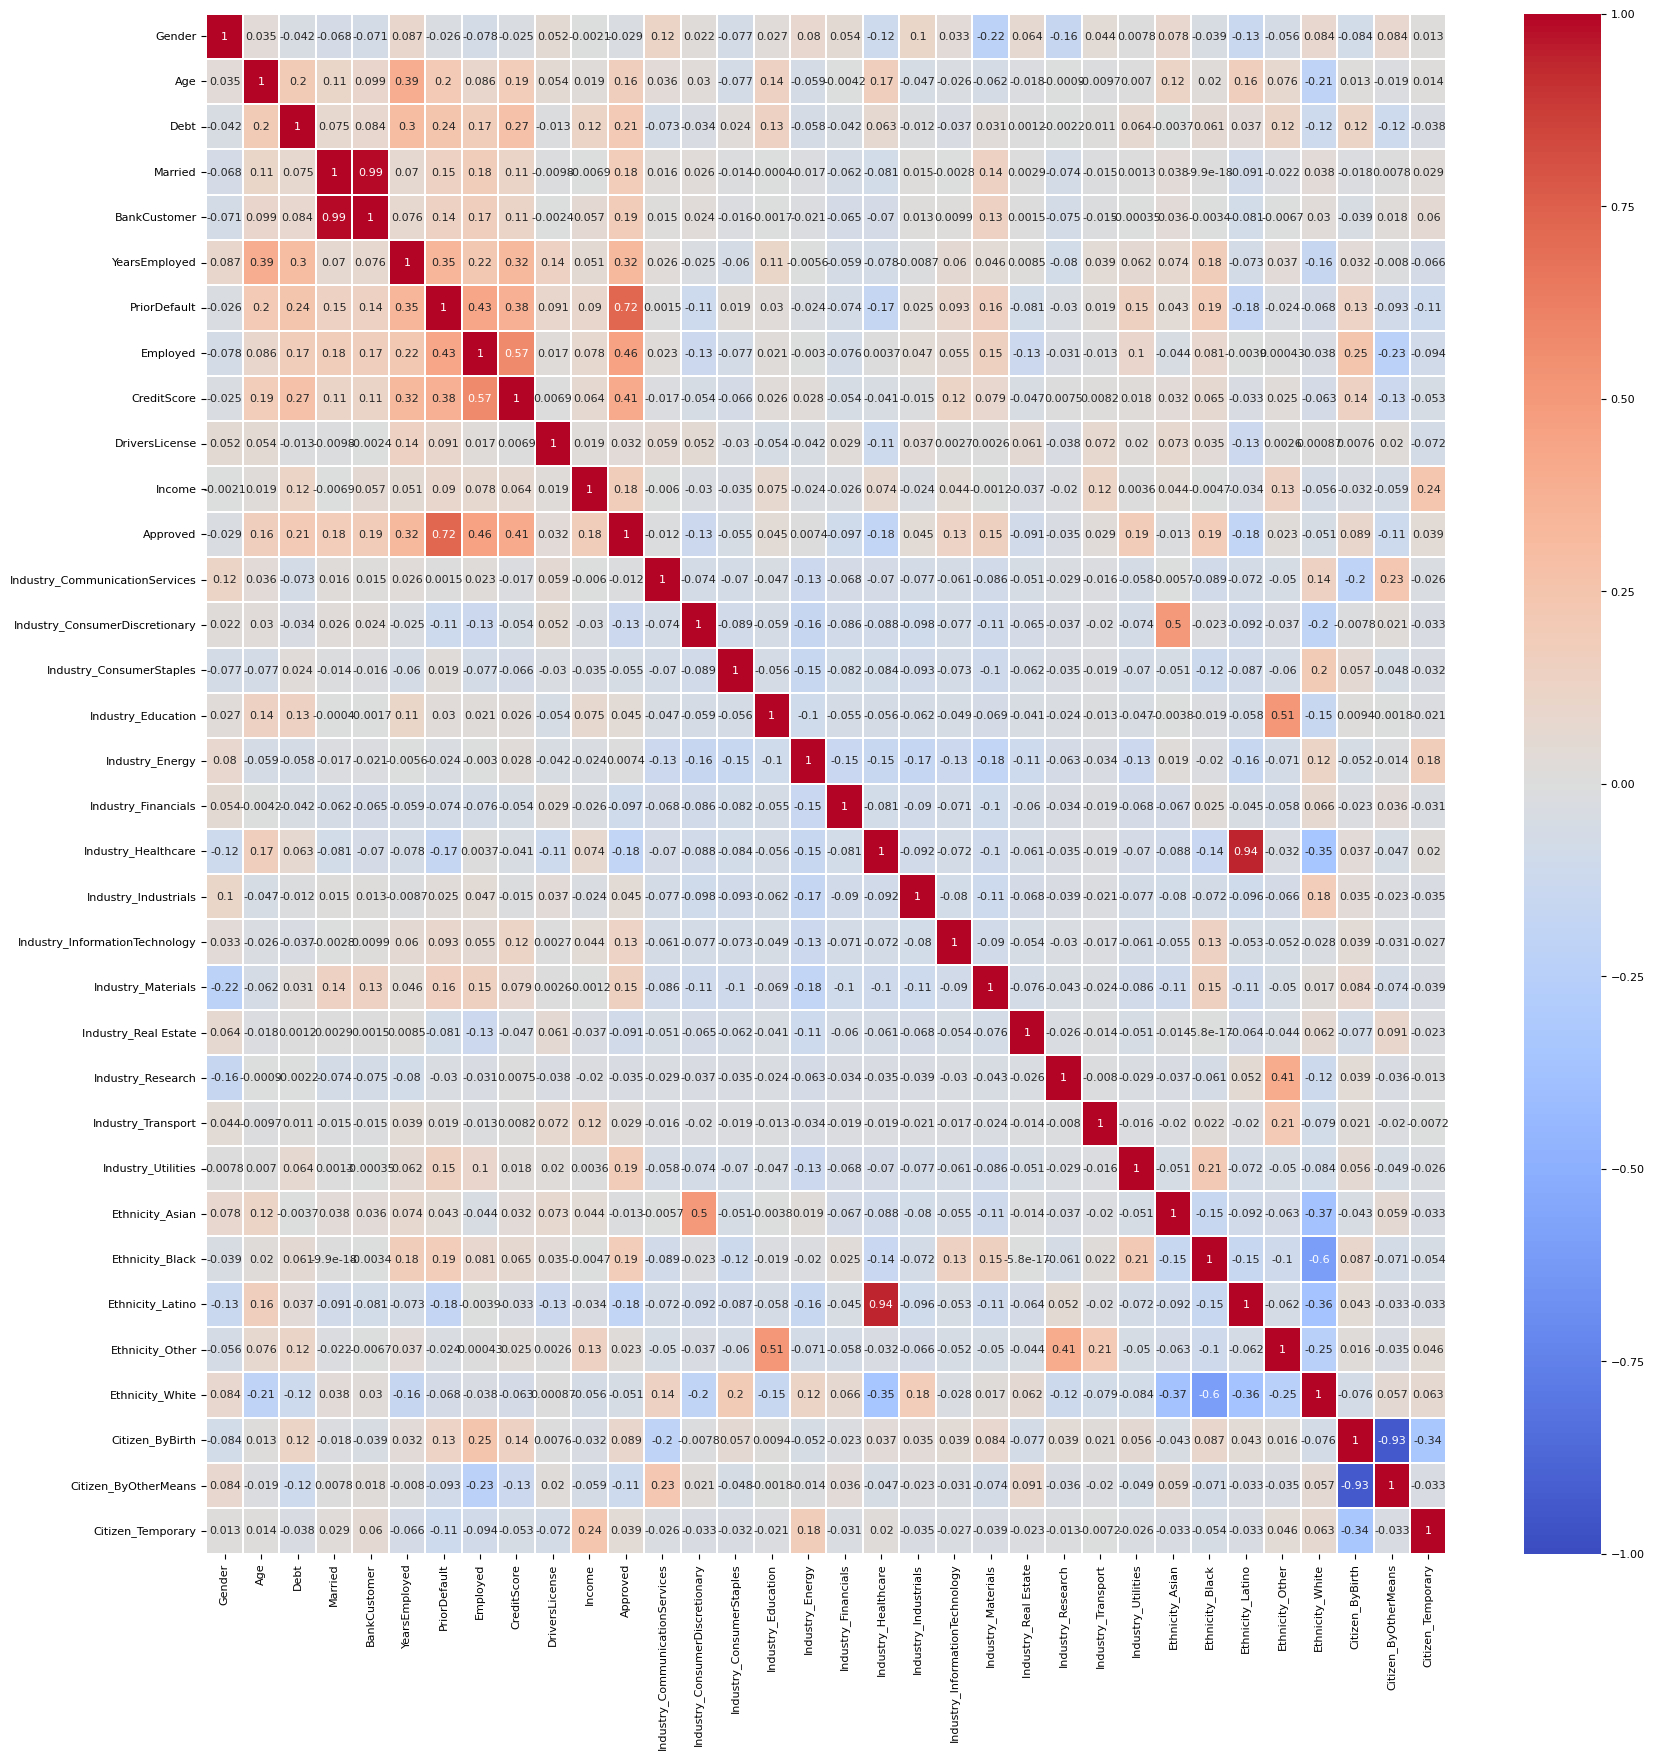

In [28]:
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(dv.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, lw=0.2, edgecolor="white")